In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Proteomic of rG4 BCL-2 (Figure 5d)

In [4]:
d1 = pd.read_excel("data/rG4_BCL2_proteins.xlsx", sheet_name="w o PDS treatment", header=1)
d2 = pd.read_excel("data/rG4_BCL2_proteins.xlsx", sheet_name="w  PDS treatment", header=1)

HNRNPF -0.82 0.87
HNRNPH1 -0.64 1.01
HNRNPH3 -0.3 1.35
RBM12 -0.17 2.2
RBM4 -2.04 2.78


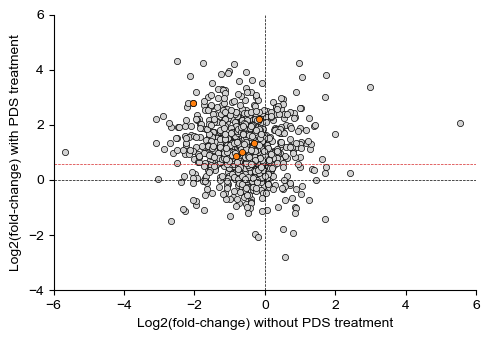

In [5]:
d1.index = [x.split()[0] for x in d1["Gene Names"]]
d2.index = [x.split()[0] for x in d2["Gene Names"]]
d1.columns = ["GeneNames", "Log2FC", "Pvalue"]
d2.columns = ["GeneNames", "Log2FC", "Pvalue"]
d = d1.merge(d2, left_index=True, right_index=True, suffixes=["_PDS(-)", "_PDS(+)"])
d = d1.merge(d2, left_index=True, right_index=True, suffixes=["_PDS(-)", "_PDS(+)"])
xs0 = d["Log2FC_PDS(-)"]
ys0 = d["Log2FC_PDS(+)"]
plt.figure(figsize=(5, 3.5))
plt.scatter(xs0, ys0, s=20, lw=0.5, edgecolor="black", color="lightgrey")
plt.xlim(-6, 6)
plt.ylim(-4, 6)
plt.axhline(0, lw=0.5, ls="--", color="black")
plt.axvline(0, lw=0.5, ls="--", color="black")
plt.axhline(np.log2(1.5), lw=0.5, ls="--", color="C3")
plt.xlabel("Log2(fold-change) without PDS treatment")
plt.ylabel("Log2(fold-change) with PDS treatment")
for loc in ["top", "right"]:
    plt.gca().spines[loc].set_visible(False)
gnames = ["HNRNPF", "HNRNPH1", "HNRNPH3", "RBM4", "RBM12"]
tmp = d[d.index.isin(gnames)]
for gname, x, y in zip(tmp.index, tmp["Log2FC_PDS(-)"], tmp["Log2FC_PDS(+)"]):
    print(gname, round(x, 2), round(y, 2))
    plt.scatter(x, y, marker="o", s=20, color="C1", label=gname, edgecolor="black", lw=0.5)
plt.tight_layout()
plt.savefig("figures/rG4_BCL2_proteins.pdf")
plt.show()
plt.close()